# Task 2: Prediction using Unsupervised ML
## NAME: Amrutha Sai

K-Means is one of the simplest unsupervised learning algorithms that solves the clustering problem.
It groups all the objects in such a way that objects in the same group are more similar to each other than to those in the other group.
For example, assume you have an image of red ball on green grass;
K-Means will split all the pixels into two groups;
The first group will have all pixels of ball and other group will have pixels of grass.

*Iris dataset contain features of iris flowers of 3 species.

*Species are "Iris-setosa", "Iris-versicolor" and "Iris-virginica"

In [2]:
# Importing the libraries
import os 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
# Load the iris dataset
os.chdir("C:/Users/lenovo-pc/Desktop/INTERNSHIP")
iris =pd.read_csv("Iris.csv")
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#information and stastics of the dataset
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Visualization

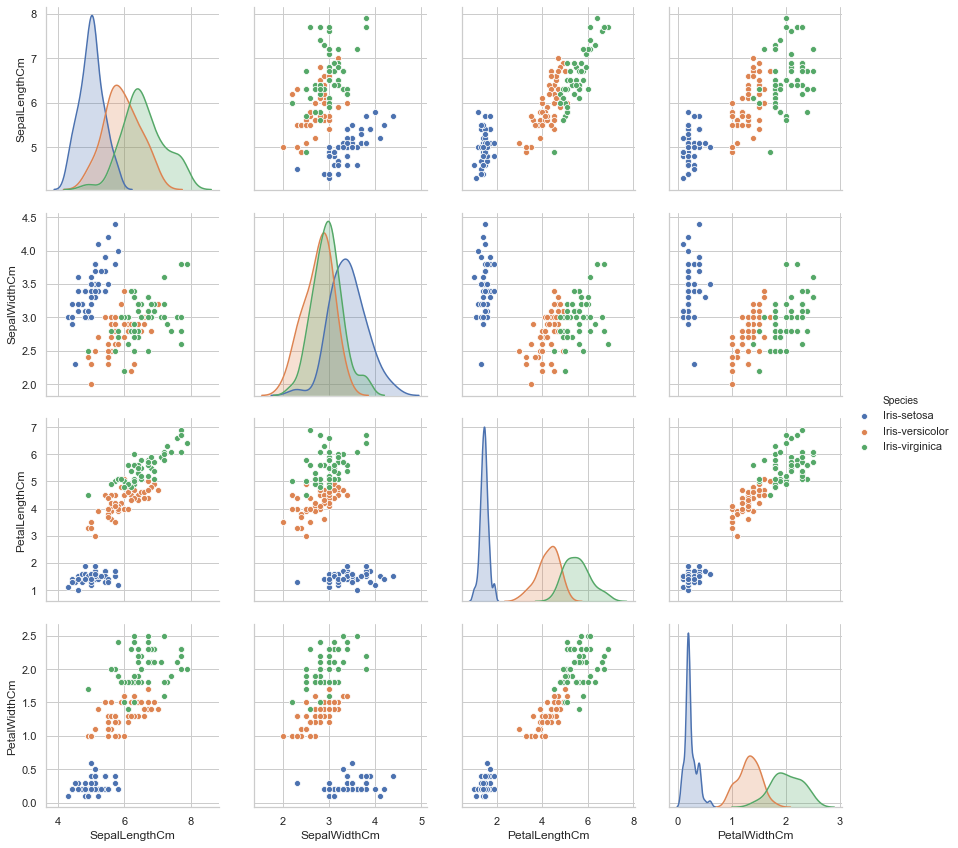

In [5]:
sns.set(style='whitegrid')
sns.pairplot(iris.drop("Id", axis=1),hue='Species',height=3, diag_kind="kde")

Pairplots are a really simple way to visualize relationships between each variable. It produces a matrix of relationships between each variable in the data for an instant examination of our data.

We can see the difference that one species Iris-Setosa has attributes different from the other two species Iris-versicolor and Iris-virginica.


In [6]:
x = iris.iloc[:,[0,1,2,3]].values

Now we select all four features i.e,. sepal length, sepal width, petal length and petal width of the dataset in a variable called x, such that we can train our model with therse independent features.
Foro this, we use the iloc function on iris and the colum index(0,1,2,3) which represent the above mentioned independent columns.

In [7]:
Kmean = KMeans(n_clusters=5)
pred_Kmean=Kmean.fit(x)

In [8]:
print(pred_Kmean)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


We will implement K-means clustering using k=5; 
For this we can instantiate the KMeans class and assign it to the variable Kmeans

In [9]:
#Code to find the center of the clusters
Kmean.cluster_centers_

array([[105.5       ,   6.25333333,   2.85666667,   5.11333333],
       [ 16.        ,   5.01935484,   3.43870968,   1.47741935],
       [ 76.        ,   6.0137931 ,   2.77586207,   4.32758621],
       [135.5       ,   6.60666667,   3.01      ,   5.48333333],
       [ 46.5       ,   5.35666667,   3.16666667,   2.48666667]])

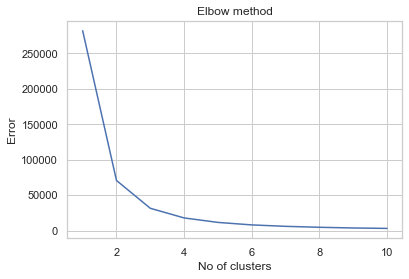

In [10]:
#Elbow mehtod, which is designed to help find the optimal number of clusters in a dataset
# So, by using this method we find the optimal value of "K"
Error = []
for i in range(1,11):
    Kmeans =KMeans(n_clusters = i).fit(x)
    Kmeans.fit(x)
    Error.append(Kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,11),Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

The shape of the elbow is approximately formed at the point 3;
 We can assign number of clusters as 3.

# Implement  Kmeans using the value 3

In [11]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

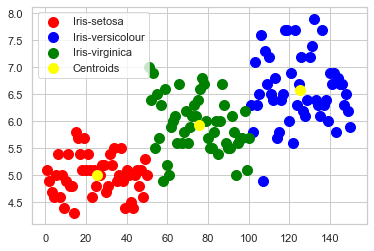

In [12]:
# Visualising the clusters - With centroids
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

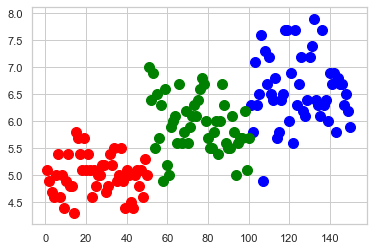

In [13]:
# Visualising the clusters - Without centroids
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')